# **Install Library & Import**

In [1]:
# Install library
!pip install langchain langchain-community replicate seaborn matplotlib pandas

# Import modul
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import userdata
from langchain_community.llms import Replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.1 MB/s eta 0:00:00


# **API**

In [2]:
#Ambil API token dari colab
api_token = userdata.get("api_token")

#Masukin token ke env var
os.environ["REPLICATE_API_TOKEN"] = api_token

In [3]:
llm = Replicate(
  model="ibm-granite/granite-3.3-8b-instruct"
)

# **Upload File**

In [5]:
# Upload file
from google.colab import files
uploaded = files.upload()

# Load CSV
df = pd.read_csv("Airline_Delay_Cause.csv")
df.head()

Saving Airline_Delay_Cause.csv to Airline_Delay_Cause.csv


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,...,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,...,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,...,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,...,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,...,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


# **Analytics Result**

In [17]:
# Cek semua kolom yang tersedia
print("Nama Kolom:")
for col in df.columns:
    print("-", col)

# Info umum tentang dataset
print("\nInfo Dataset:")
df.info()

# Drop NA di kolom-kolom delay utama (biar gak ganggu analisis)
delay_columns = ["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]
df = df.dropna(subset=delay_columns)


Nama Kolom:
- year
- month
- carrier
- carrier_name
- airport
- airport_name
- arr_flights
- arr_del15
- carrier_ct
- weather_ct
- nas_ct
- security_ct
- late_aircraft_ct
- arr_cancelled
- arr_diverted
- arr_delay
- carrier_delay
- weather_delay
- nas_delay
- security_delay
- late_aircraft_delay

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 100960 entries, 0 to 101314
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 100960 non-null  int64  
 1   month                100960 non-null  int64  
 2   carrier              100960 non-null  object 
 3   carrier_name         100960 non-null  object 
 4   airport              100960 non-null  object 
 5   airport_name         100960 non-null  object 
 6   arr_flights          100960 non-null  float64
 7   arr_del15            100960 non-null  float64
 8   carrier_ct           100960 non-null  float64
 9   weather_ct      

In [46]:
# Cek Missing Value
print("Jumlah Missing Value per Kolom:")
missing = df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

# Cek Duplikat
print("\nJumlah Baris Duplikat:", df.duplicated().sum())

# Cek Nilai Negatif di Kolom Delay
delay_columns = [
    "carrier_delay",
    "weather_delay",
    "nas_delay",
    "security_delay",
    "late_aircraft_delay"
]

print("\nCek Nilai Negatif di Kolom Delay:")
for col in delay_columns:
    if (df[col] < 0).any():
        print(f" Ada nilai negatif di kolom: {col}")
    else:
        print(f" Kolom {col} aman (tidak ada nilai negatif)")

# Cek Tipe Data
print("\nTipe Data per Kolom:")
print(df.dtypes)

Jumlah Missing Value per Kolom:
Series([], dtype: int64)

Jumlah Baris Duplikat: 0

Cek Nilai Negatif di Kolom Delay:
 Kolom carrier_delay aman (tidak ada nilai negatif)
 Kolom weather_delay aman (tidak ada nilai negatif)
 Kolom nas_delay aman (tidak ada nilai negatif)
 Kolom security_delay aman (tidak ada nilai negatif)
 Kolom late_aircraft_delay aman (tidak ada nilai negatif)

Tipe Data per Kolom:
year                           int64
month                          int64
carrier                       object
carrier_name                  object
airport                       object
airport_name                  object
arr_flights                  float64
arr_del15                    float64
carrier_ct                   float64
weather_ct                   float64
nas_ct                       float64
security_ct                  float64
late_aircraft_ct             float64
arr_cancelled                float64
arr_diverted                 float64
arr_delay                    float64
carri

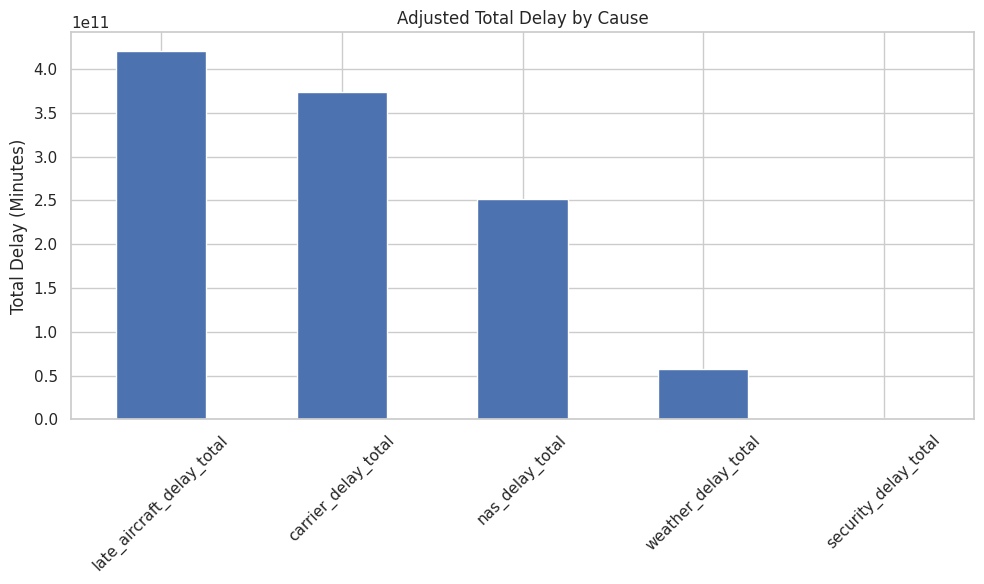

In [47]:
for col in delay_cols:
    df[col + "_total"] = df[col] * df["arr_flights"]

# Total delay after adjustment
adjusted_cols = [col + "_total" for col in delay_cols]

df[adjusted_cols].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Adjusted Total Delay by Cause")
plt.ylabel("Total Delay (Minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

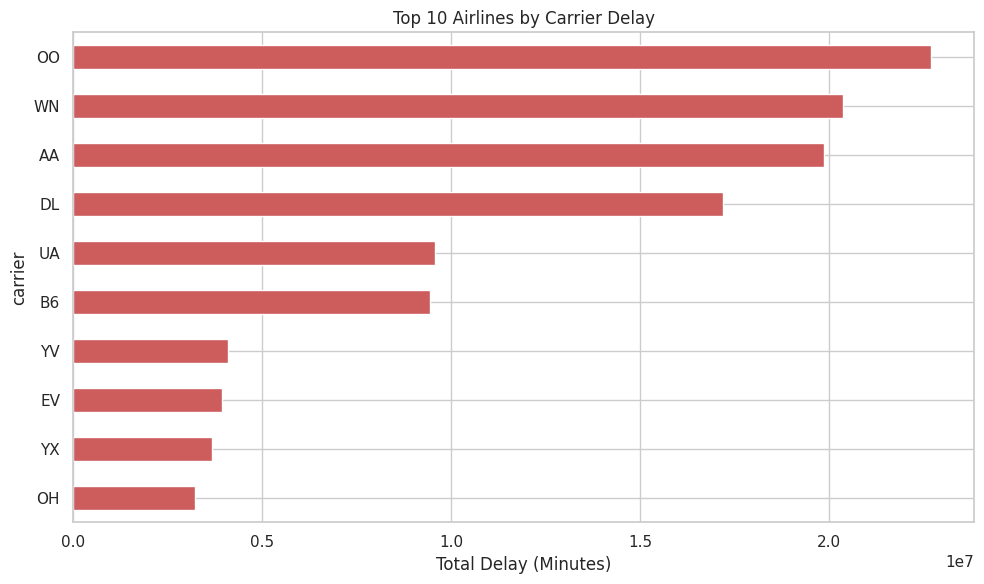

In [25]:
# 2. Top 10 Airlines by Carrier Delay (Horizontal Bar Chart)
top_airlines = df.groupby("carrier")["carrier_delay"].sum().sort_values(ascending=False).head(10)
top_airlines.plot(kind='barh', color='indianred')
plt.title("Top 10 Airlines by Carrier Delay")
plt.xlabel("Total Delay (Minutes)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

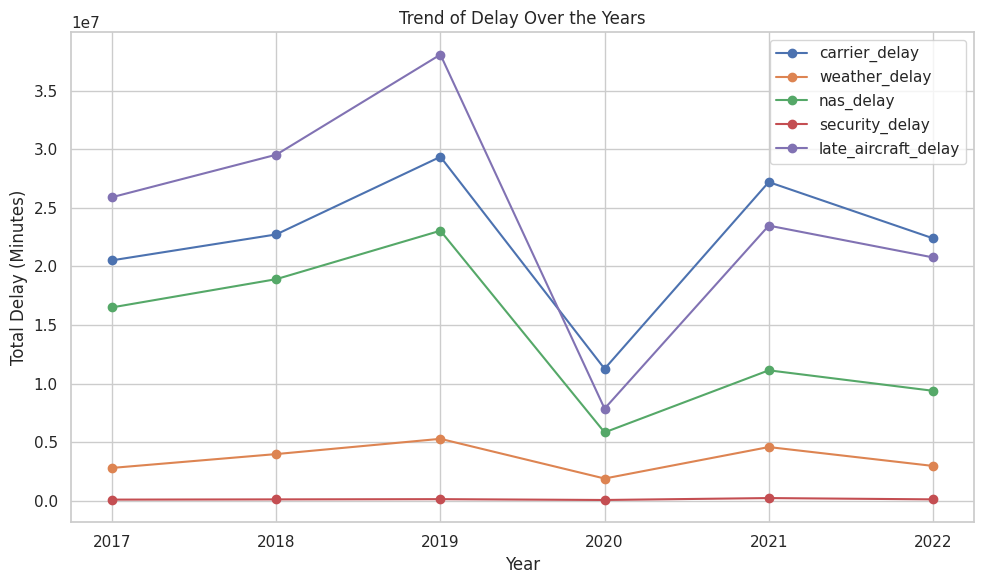

In [26]:
# 3. Trend of Delay Over Years (Line Chart)
yearly_trend = df.groupby("year")[delay_cols].sum()
yearly_trend.plot(marker='o')
plt.title("Trend of Delay Over the Years")
plt.ylabel("Total Delay (Minutes)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

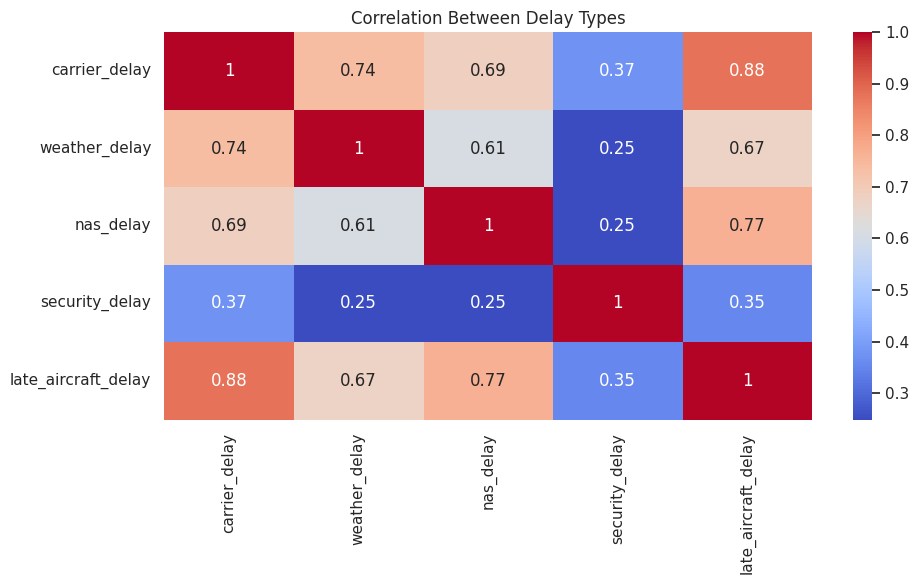

In [27]:
# 4. Correlation Heatmap of Delay Types
corr = df[delay_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Delay Types")
plt.tight_layout()
plt.show()

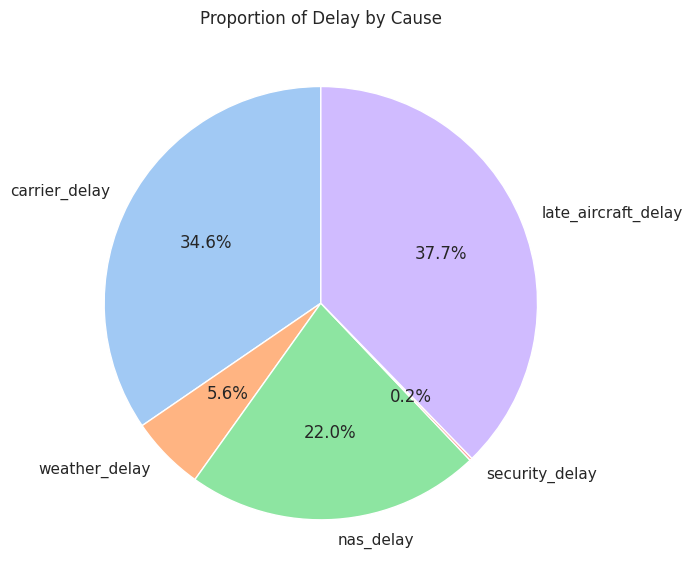

In [28]:
# 5. Pie Chart: Proportion of Each Delay Type
total = df[delay_cols].sum()
plt.pie(total, labels=total.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Proportion of Delay by Cause")
plt.tight_layout()
plt.show()

# **Insight & Findings**

In [58]:
prompt_adjusted_delay = """
Berikut total keterlambatan (delay) penerbangan berdasarkan penyebab (dalam menit):

1. late_aircraft_delay_total = sangat tinggi
2. carrier_delay_total = hampir setara dengan late aircraft
3. nas_delay_total = sedang
4. weather_delay_total = cukup rendah
5. security_delay_total = sangat rendah

Buatkan insight singkat (maksimal 3 kalimat) dalam Bahasa Indonesia.
Tunjukkan penyebab utama delay dan saran singkat yang bisa diambil dari data ini.
"""

insight_output = llm.invoke(prompt_adjusted_delay)
print(insight_output)


Dari data yang diberikan, penyebab utama delay terkait penerbangan adalah keterlambatan pesawat (late_aircraft_delay_total) yang sangat tinggi dan keterlambatan landasan udara (carrier_delay_total) yang hampir sama dengan keterlambatan pesawat. Saran singkat yang dapat diambil dari data ini adalah untuk meningkatkan keberlangsungan dan keakuratan jadwal penerbangan, serta memperhatikan dan memperkaya penanganan keterlambatan akibat cuaca (weather_delay_total) yang cukup rendah secara umum. Selain itu, perhatian terhadap keterlambatan keamanan (security_delay_total) yang sangat rendah juga harus dijaga agar tidak menjadi faktor penyebab delay di masa depan. Nas (nas_delay_total) yang sedang mungkin memerlukan perhatian jika menunjukkan tren yang meningkat secara terus-menerus, menandakan masalah potensial yang harus dipertimbangkan.


In [51]:
prompt = """
Berikut persentase penyebab delay penerbangan:
- late_aircraft_delay: 37.7%
- carrier_delay: 34.6%
- nas_delay: 22.0%
- weather_delay: 5.6%
- security_delay: 0.2%

Buatkan insight singkat (maksimal 3 kalimat). Sebut penyebab utama dan 1 saran perbaikan.
"""

insight_output = llm.invoke(prompt)
print(f"""{insight_output}""")


Berdasarkan data, penyebab utama delay penerbangan adalah keterlambatan pesawat (37.7%) dan keterlambatan penerbangan (34.6%). Untuk mengurangi delay, maskapai dapat melakukan perbaikan dalam pengaturan penerbangan, termasuk pengelolaan waktu pesawat dengan lebih baik dan mendorong penerbangan lebih teratur, serta meningkatkan komunikasi antara staf penerbangan dan penumpang. Selain itu, investasi dalam infrastruktur dan teknologi yang lebih baik untuk pengawasan penerbangan dapat membantu mengurangi keterlambatan akibat faktor luar seperti cuaca dan prosedur keamanan yang berlebihan.


In [52]:
prompt = """
Berikut total delay penerbangan (dalam menit):

2018: 6.2 juta
2019: 6.5 juta
2020: 5.1 juta
2021: 5.3 juta
2022: 5.7 juta

Berikan insight singkat (maksimal 3 kalimat) mengenai tren delay tahunan dan 1 rekomendasi yang relevan.
"""
output = llm.invoke(prompt)
print(f"""{output}""")

Berdasarkan data tahunan, tren delay penerbangan menunjukkan fluktuasi pada beberapa tahun tersebut. Peningkatan terbesar terjadi dari 2018 (6,2 juta menit) ke 2019 (6,5 juta menit), berikut dengan penurunan di tahun 2020 (5,1 juta menit) mungkin akibat pandemie COVID-19. Penurunan tersebut diikuti oleh kemunculan kembali pada 2021 (5,3 juta menit) dan lebih meningkat lagi pada 2022 (5,7 juta menit). 

Rekomendasi: untuk meningkatkan kepuasan pelanggan dan efektivitas operasi, maskapai penerbangan bisa melakukan investasi terus menerus dalam infrastruktur dan teknologi yang bertujuan mengurangi panas baris, seperti menerapkan sistem operasi penerbangan yang lebih efektif dan memanfaatkan data analitik untuk prediksi dan mengatasi potensi delay sebelum terjadi.


In [50]:
prompt_carrier_delay = """
Berikut 10 maskapai dengan carrier delay tertinggi (dalam menit):

1. OO
2. WN
3. AA
4. DL
5. UA
6. B6
7. YV
8. EV
9. YX
10. OH

Buat insight singkat (maksimal 3 kalimat). Sebut maskapai dengan delay tertinggi, dan beri 1 rekomendasi umum untuk mengurangi delay akibat maskapai.
"""
output = llm.invoke(prompt_carrier_delay)
print(f"""{output}""")

10 maskapai dengan carrier delay tertinggi tersebut adalah OO, WN (Southwest Airlines), AA (American Airlines), DL (Delta Air Lines), UA (United Airlines), B6 (JetBlue Airways), YV (Azul Brazilian Airlines), EV (Viva Air), YX (Air Asia X), dan OH (WestJet). 

Untuk mengurangi delay akibat maskapai, rekomendasi umum adalah memilih flight dengan lebih banyak waktu pengeran, dan mendaftar untuk notifikasi pemberitahuan maskapai. Hal ini akan membantu Anda mengetahui perubahan jadwal dan mengambil keputusan yang lebih proaktif. Selain itu, panduan penerbangan dengan waktu yang lebih lama dan memiliki tiket penerbangan yang fleksibel dapat membantu mengatasi kekhawatiran dari delay maskapai.


In [53]:
prompt_corr = """
Berikut adalah korelasi antar jenis delay penerbangan (nilai antara 0–1):

- carrier_delay dan late_aircraft_delay: 0.88
- carrier_delay dan weather_delay: 0.74
- late_aircraft_delay dan nas_delay: 0.77
- weather_delay dan nas_delay: 0.61
- security_delay memiliki korelasi rendah dengan semua jenis delay (paling tinggi 0.37)

Buatkan insight singkat (maksimal 3 kalimat) dari data korelasi ini. Sebutkan hubungan yang paling kuat, serta 1 rekomendasi yang bisa diambil dari pola ini.
"""

output = llm.invoke(prompt_corr)
print(f"""{output}""")

Hubungan korelasi antar jenis delay penerbangan menunjukkan bahwa carrier_delay (0.88) dan late_aircraft_delay memiliki hubungan kuat. Selain itu, weather_delay (0.74) juga memiliki korelasi yang tinggi dengan carrier_delay. Rekomendasi: Penting untuk memperhatikan korelasi antara carrier_delay dan late_aircraft_delay karena sifat kuatnya, serta melihat bagaimana faktor cuaca dapat mempengaruhi delay penerbangan melalui korelasi dengan carrier_delay. Strategi untuk mengurangi total delay mungkin melibatkan pengembangan prediksi cuaca lebih akurat dan pengelolaan flotasi pesawat yang lebih efektif.


# **Recommendations**

In [56]:
prompt_final_reco = """
Berdasarkan analisis data delay penerbangan dari segi penyebab, tren tahunan, maskapai, dan korelasi antar delay,
berikan 2 rekomendasi strategis (maksimal 3 kalimat) yang bersifat umum dan menyeluruh.

Tuliskan jawabannya dalam Bahasa Indonesia yang singkat, jelas, dan langsung ke inti.
"""

output = llm.invoke(prompt_final_reco)
print(f"""{output}""")

1. **Memperkuat Sistem Informasi Maskapai**: Memperkuat sistem informasi maskapai agar dapat memonitor dan mengurangi delay penerbangan. Ini dapat dilakukan dengan mengimplementasikan teknologi real-time yang menghubungkan semua komponen operasi, sehingga maskapai dapat berkomunikasi secara cepat dan akurat dengan pihak-pihak terkait, seperti penerbangan, layanan tertib, dan staf penerbangan.

2. **Menerapkan Strategi Peningkatan Infrastruktur**: Investasikan dalam peningkatan dan perbaikan infrastruktur di bandara, termasuk terminal penerbangan, jalur taxi, dan sistem navigasi. Peningkatan kualitas dan efisiensi infrastruktur dapat mengurangi delay akibat keterlambatan operasi di bandara, sehingga terhindari kumulatif delay akibat keterlambatan akibat keterlambatan operasi di bandara.
